## 1.数据收集与整合

In [9]:
# 加载数据分析需要使用的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#数据加载和整合
df = pd.read_csv('G:\上课文件\Python计算\数据作业\Basket-2018-06-01-2018-07-05.csv',encoding='ISO-8859-1')
df['SHOP_DATETIME'] = pd.to_datetime(df.SHOP_DATETIME,format='%Y-%m-%d')
df.head()
#数据大小
print(df.shape)
#数据分布情况
df.describe()

(571552, 5)


POS_NO      BASK_CODE     BASK_SPEND
count  571552.000000  571552.000000  571552.000000
mean        2.998429  167472.817102      38.973310
std         2.516065   87263.199857     209.038276
min         1.000000     961.000000  -35940.000000
25%         1.000000   90533.750000       9.000000
50%         2.000000  177603.500000      19.900000
75%         3.000000  238816.750000      44.700000
max        20.000000  323914.000000   79920.000000

## 2.数据清洗

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571552 entries, 0 to 571551
Data columns (total 5 columns):
SHOP_DATETIME    571552 non-null datetime64[ns]
STORE_CODE       571552 non-null object
POS_NO           571552 non-null int64
BASK_CODE        571552 non-null int64
BASK_SPEND       571552 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 21.8+ MB


In [11]:
# 擦看有无异常值
df.describe()    #BASK_SPEND有复数出现异常，需要处理
#重复值处理
df.duplicated().sum()   #无重复值，不需要处理

0

## 3.数据分析及可视化

### 3.1 销售情况分析

In [15]:
df.columns

Index(['SHOP_DATETIME', 'STORE_CODE', 'POS_NO', 'BASK_CODE', 'BASK_SPEND'], dtype='object')

In [16]:
# 整体销售情况子数据集，包含下单日期、销售额、销量、利润、年份、月份信息
sales_day = df[['SHOP_DATETIME', 'BASK_SPEND']]

#按照年份、月份对销售子数据集进行分组求和
sales_day = sales_day.groupby(['SHOP_DATETIME']).sum()

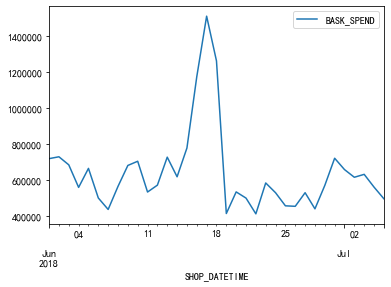

In [17]:
sales_day.plot()

### 3.2 商品情况分析

### 销售额前十名的商品

In [18]:
productId_count = df.groupby('STORE_CODE').count()['BASK_SPEND'].sort_values(ascending=False)
print(productId_count.head(10))

STORE_CODE
A001    66507
D002    62949
D007    37503
A008    36462
A013    30064
A006    28470
A012    24946
A009    21809
D004    21362
D008    21029
Name: BASK_SPEND, dtype: int64


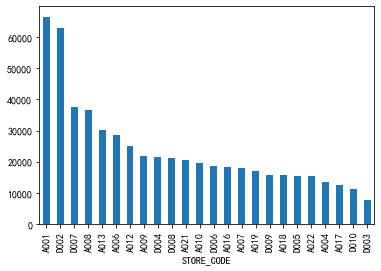

In [19]:
productId_count.plot(kind='bar')

## 3.3 用户下单行为分析

### 3.3.1 用户消费金额、消费次数的描述统计

In [20]:
# 客户消费分析
grouped_Customer = df[['BASK_CODE','SHOP_DATETIME', 
          'BASK_SPEND']].sort_values(['SHOP_DATETIME']).groupby('BASK_CODE')
grouped_Customer.head()

BASK_CODE SHOP_DATETIME  BASK_SPEND
0          250458    2018-06-01         8.0
215288     250469    2018-06-01        89.7
215287     161017    2018-06-01         9.9
215286     161158    2018-06-01         4.0
215285     250476    2018-06-01        86.4
...           ...           ...         ...
355739     124578    2018-07-05        23.4
355738     124587    2018-07-05        10.0
355737     141664    2018-07-05       149.8
355819     291779    2018-07-05         7.2
571551     284265    2018-07-05        43.2

[567089 rows x 3 columns]

In [21]:
# 用户消费金额、消费次数的描述统计(在此为平均每个用户平均消费金额，不是每笔平均消费金额)
grouped_Customer.count().describe()

SHOP_DATETIME     BASK_SPEND
count  280816.000000  280816.000000
mean        2.029076       2.029076
std         1.077605       1.077605
min         1.000000       1.000000
25%         1.000000       1.000000
50%         2.000000       2.000000
75%         3.000000       3.000000
max         7.000000       7.000000

In [22]:
grouped_Customer['BASK_SPEND'].sum().describe()

count    280816.000000
mean         80.317314
std         282.972947
min           0.010000
25%          20.700000
50%          48.940000
75%          98.700000
max       80064.900000
Name: BASK_SPEND, dtype: float64

### 3.3.2 用户消费金额分布图

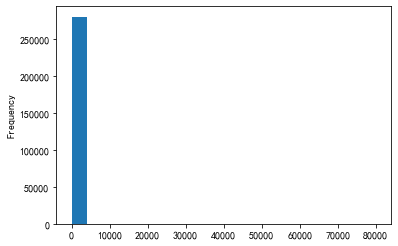

In [23]:
# 用户消费金额分布图
grouped_Customer.sum().BASK_SPEND.plot.hist(bins = 20)

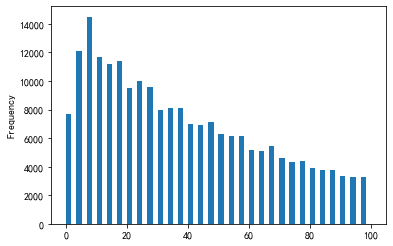

In [24]:
grouped_Customer.sum().query('BASK_SPEND < 100').BASK_SPEND.plot.hist(width=[1.7],bins = 30)

### 3.3.3 用户累计消费占比

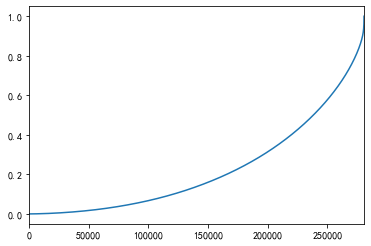

In [25]:
# 用户累计消费占比（百分之多少的用户占百分之多少的销售额）
grouped_Customer.sum().sort_values('BASK_SPEND').apply(lambda x : x.cumsum()/ x.sum()).reset_index().BASK_SPEND.plot()

**购买时间分析**

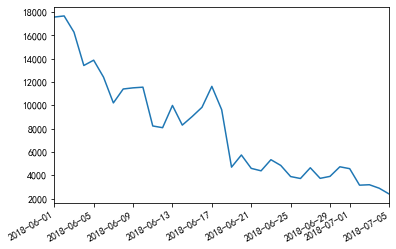

In [26]:
# 用户第一次消费（首购）
grouped_Customer.min().SHOP_DATETIME.value_counts().plot()

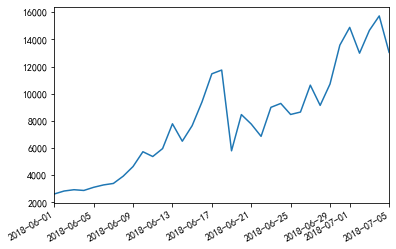

In [27]:
# 用户最后一次消费
grouped_Customer.max().SHOP_DATETIME.value_counts().plot()

### 3.3.4 新老客户消费比

([<matplotlib.patches.Wedge at 0x1b7e0fb5148>,
 [Text(-0.3521304189966928, 1.0421152373980593, 'False'),
  Text(0.35213051656656097, -1.042115204429226, 'True')],
 [Text(-0.19207113763455969, 0.5684264931262142, '60.37%'),
  Text(0.1920711908544878, -0.568426475143214, '39.63%')])

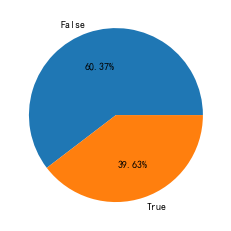

In [28]:
# 多少用户仅消费1次
user_life =grouped_Customer.SHOP_DATETIME.agg(['min','max'])
(user_life['min'] == user_life['max']).value_counts()
# 可视化（饼图）
plt.pie((user_life['min'] == user_life['max']).value_counts(normalize = True),
       autopct='%.2f%%',
       labels = (user_life['min'] == user_life['max']).value_counts().index)